In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 1. 데이터셋 불러오기
데이터셋은 torchvision 패키지에서 제공하는 STL10 dataset을 이용하겠습니다. STL10 dataset은 10개의 label을 갖으며 train dataset 5000개, test dataset 8000개로 구성됩니다.

In [4]:
# import package

# model
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torch import optim

# dataset and transformation
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import os

# display images
from torchvision import utils
import matplotlib.pyplot as plt
%matplotlib inline

# utils
import numpy as np
from torchsummary import summary
import time
import copy

Transforms => Torchvision의 package 중 하나.
대표적인 기능
- Rescale : 이미지의 크기를 조정
- RandomCrop : 이미지를 무작위로 자름 (data augmentation)
- To Tensor : numpy이미지에서 torch 이미지로 전환


In [5]:
# specift the data path
path2data = '/content/gdrive/My Drive/python/practice_0729/Inception'

# if not exists the path, make the directory
if not os.path.exists(path2data):
    os.mkdir(path2data)

# load dataset
train_ds = datasets.STL10(path2data, split='train', download=True, transform=transforms.ToTensor())
val_ds = datasets.STL10(path2data, split='test', download=True, transform=transforms.ToTensor())

print(len(train_ds))
print(len(val_ds))

Files already downloaded and verified
Files already downloaded and verified
5000
8000


In [5]:
os.path.exists(path2data) #실제로 있었나 확인...

True

In [6]:
# define image transformation
transformation = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Resize(299)
])

train_ds.transform = transformation
val_ds.transform = transformation

### △transformation 이라는 객체 정의 : torch 이미지 전환 + Resize(299)

In [7]:
# create dataloader
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True) #5000개의 train data를 8개의 batch로 나누어 loading
val_dl = DataLoader(val_ds, batch_size=8, shuffle=True)  #8000개의 val data를 8개의 batch로 나누어 loading

## Dataloader

In [9]:
np.random.seed(1)
rnd_ind = np.random.randint(0, len(train_ds), grid_size)
print(rnd_ind)

[ 235 3980  905 2763]


In [10]:
print(len(train_ds))

5000


In [11]:
train_ds[0] #하나당 이미지 값 하나라고 보면 됨 (이건 tensor + label 로 이루어져 있음.)

(tensor([[[0.5725, 0.5725, 0.5725,  ..., 0.6353, 0.6353, 0.6353],
          [0.5725, 0.5725, 0.5725,  ..., 0.6353, 0.6353, 0.6353],
          [0.5725, 0.5725, 0.5725,  ..., 0.6365, 0.6365, 0.6365],
          ...,
          [0.5282, 0.5282, 0.5043,  ..., 0.5471, 0.5400, 0.5400],
          [0.5294, 0.5294, 0.4843,  ..., 0.5519, 0.5412, 0.5412],
          [0.5294, 0.5294, 0.4843,  ..., 0.5519, 0.5412, 0.5412]],
 
         [[0.5608, 0.5608, 0.5608,  ..., 0.6235, 0.6235, 0.6235],
          [0.5608, 0.5608, 0.5608,  ..., 0.6235, 0.6235, 0.6235],
          [0.5608, 0.5608, 0.5608,  ..., 0.6223, 0.6223, 0.6223],
          ...,
          [0.4655, 0.4655, 0.4439,  ..., 0.5005, 0.4925, 0.4925],
          [0.4667, 0.4667, 0.4239,  ..., 0.5115, 0.5020, 0.5020],
          [0.4667, 0.4667, 0.4239,  ..., 0.5115, 0.5020, 0.5020]],
 
         [[0.4314, 0.4314, 0.4314,  ..., 0.4941, 0.4941, 0.4941],
          [0.4314, 0.4314, 0.4314,  ..., 0.4941, 0.4941, 0.4941],
          [0.4314, 0.4314, 0.4314,  ...,

In [15]:
train_ds[0][0].shape # 이미지 하나 당 299x299 size의 객체가 3개씩 존재 (3개는 R,G,B Channel이 된다.) (size는 픽셀값일 듯?)

torch.Size([3, 299, 299])

In [24]:
# display sample images
def show(img, y=None, color=True): 
    npimg = img.numpy()
    npimg_tr = np.transpose(npimg, (1, 2, 0))
    plt.imshow(npimg_tr)

    if y is not None:
        plt.title('labels:' + str(y))

np.random.seed(1)
torch.manual_seed(0)

grid_size = 4
rnd_ind = np.random.randint(0, len(train_ds), grid_size)

x_grid = [train_ds[i][0] for i in rnd_ind]
y_grid = [train_ds[i][1] for i in rnd_ind]

print(len(x_grid)) #4개가 받아지게 된다!


4


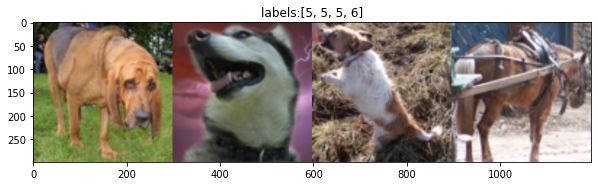

In [14]:
plt.figure(figsize=(10,10))
x_grid_2 = utils.make_grid(x_grid, nrow=4, padding=0)
show(x_grid_2, y_grid)

In [16]:
print(x_grid_2) #padding이 되어 있지 않을 때

tensor([[[0.1451, 0.1451, 0.1546,  ..., 0.6101, 0.5804, 0.5804],
         [0.1451, 0.1451, 0.1546,  ..., 0.6101, 0.5804, 0.5804],
         [0.1404, 0.1404, 0.1491,  ..., 0.6094, 0.5887, 0.5887],
         ...,
         [0.4963, 0.4963, 0.4993,  ..., 0.9841, 0.9862, 0.9862],
         [0.5176, 0.5176, 0.5236,  ..., 0.9886, 0.9922, 0.9922],
         [0.5176, 0.5176, 0.5236,  ..., 0.9886, 0.9922, 0.9922]],

        [[0.1490, 0.1490, 0.1585,  ..., 0.5339, 0.5137, 0.5137],
         [0.1490, 0.1490, 0.1585,  ..., 0.5339, 0.5137, 0.5137],
         [0.1443, 0.1443, 0.1530,  ..., 0.5305, 0.5197, 0.5197],
         ...,
         [0.5047, 0.5047, 0.5196,  ..., 0.9659, 0.9685, 0.9685],
         [0.5451, 0.5451, 0.5582,  ..., 0.9756, 0.9804, 0.9804],
         [0.5451, 0.5451, 0.5582,  ..., 0.9756, 0.9804, 0.9804]],

        [[0.1059, 0.1059, 0.1094,  ..., 0.5148, 0.4863, 0.4863],
         [0.1059, 0.1059, 0.1094,  ..., 0.5148, 0.4863, 0.4863],
         [0.0988, 0.0988, 0.1027,  ..., 0.5125, 0.4934, 0.

In [17]:
print(x_grid_2.shape)

torch.Size([3, 299, 1196])


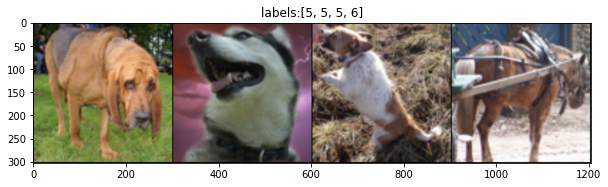

In [25]:
plt.figure(figsize=(10,10))
x_grid = utils.make_grid(x_grid, nrow=4, padding=2)
show(x_grid, y_grid)

In [26]:
x_grid.shape #세로 303 가로 1206 pixel을 갖게끔 합친 듯. (#padding이 되어 있을 때)

torch.Size([3, 303, 1206])

In [27]:
x_grid

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.1451,  ..., 0.5804, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.5176,  ..., 0.9922, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.1490,  ..., 0.5137, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.5451,  ..., 0.9804, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.1059,  ..., 0.4863, 0.0000, 0.

# 2. 모델 구축하기
 구현할 모델은 Inception-ResNet-v2 입니다.
 Inception-ResNet-v2는 Inception-v4에 residual block을 사용하는 모델입니다.
 
 코드는 https://github.com/weiaicunzai/pytorch-cifar100/blob/master/models/inceptionv4.py 를 참고했습니다.


https://deep-learning-study.tistory.com/537?category=983681
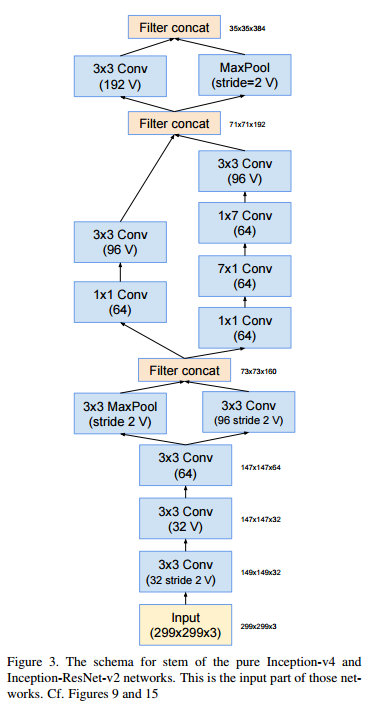

In [19]:
class BasicConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, **kwargs):
        super().__init__()

        # bias=Fasle, because BN after conv includes bias.
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size, bias=False, **kwargs),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )
     

    def forward(self, x):
        x = self.conv(x)
        return x

 # conv2d + BatchNorm + ReLU가 Basic한 Conv2d module

#-------------------------------------------------------------------------


class Stem(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Sequential(
            BasicConv2d(3, 32, 3, stride=2, padding=0), # 149 x 149 x 32
            BasicConv2d(32, 32, 3, stride=1, padding=0), # 147 x 147 x 32
            BasicConv2d(32, 64, 3, stride=1, padding=1), # 147 x 147 x 64 
        )

        self.branch3x3_conv = BasicConv2d(64, 96, 3, stride=2, padding=0) # 73x73x96

        #  kernel_size=4: 피쳐맵 크기 73, kernel_size=3: 피쳐맵 크기 74
        self.branch3x3_pool = nn.MaxPool2d(4, stride=2, padding=1) # 73x73x64

# 첫 번째 filter concat 전까지의 구조 ----------------------------------
#-------------------------------------------------------------------------

        self.branch7x7a = nn.Sequential(  #왼쪽 줄기
            BasicConv2d(160, 64, 1, stride=1, padding=0),
            BasicConv2d(64, 96, 3, stride=1, padding=0)
        ) # 71x71x96

        self.branch7x7b = nn.Sequential(   #오른쪽 줄기
            BasicConv2d(160, 64, 1, stride=1, padding=0),
            BasicConv2d(64, 64, (7,1), stride=1, padding=(3,0)),
            BasicConv2d(64, 64, (1,7), stride=1, padding=(0,3)),
            BasicConv2d(64, 96, 3, stride=1, padding=0)
        ) # 71x71x96
#padding이 0이 적용되는 경우는 어떠한 경우이고 3,0은 또 뭔가????????

# 두 번째 filter concat 전까지의 구조 ---------------------------------- (filter concat은 어떻게 구현되는 것인가?)
#-------------------------------------------------------------------------

        self.branchpoola = BasicConv2d(192, 192, 3, stride=2, padding=0) # 35x35x192

        #  kernel_size=4: 피쳐맵 크기 73, kernel_size=3: 피쳐맵 크기 74
        self.branchpoolb = nn.MaxPool2d(4, 2, 1) # 35x35x192

# 세 번째 filter concat 전까지의 구조 ---------------------------------- (filter concat은 어떻게 구현되는 것인가?)
#-------------------------------------------------------------------------


    def forward(self, x):
        x = self.conv1(x)
        x = torch.cat((self.branch3x3_conv(x), self.branch3x3_pool(x)), dim=1)
        x = torch.cat((self.branch7x7a(x), self.branch7x7b(x)), dim=1)
        x = torch.cat((self.branchpoola(x), self.branchpoolb(x)), dim=1)
        return x
#filter들이 concat 되는 부분
#--------------------------------------------------------------------


In [ ]:

class Inception_Resnet_A(nn.Module):
    def __init__(self, in_channels):
        super().__init__()

        self.branch1x1 = BasicConv2d(in_channels, 32, 1, stride=1, padding=0)  #1열 부분

        self.branch3x3 = nn.Sequential(
            BasicConv2d(in_channels, 32, 1, stride=1, padding=0),  #2열 부분
            BasicConv2d(32, 32, 3, stride=1, padding=1)
        )

        self.branch3x3stack = nn.Sequential(   # 3열 부분
            BasicConv2d(in_channels, 32, 1, stride=1, padding=0),
            BasicConv2d(32, 48, 3, stride=1, padding=1),
            BasicConv2d(48, 64, 3, stride=1, padding=1)
        )
        
        self.reduction1x1 = nn.Conv2d(128, 384, 1, stride=1, padding=0)  
        self.shortcut = nn.Conv2d(in_channels, 384, 1, stride=1, padding=0)
        self.bn = nn.BatchNorm2d(384)
        self.relu = nn.ReLU()

    def forward(self, x):
        x_shortcut = self.shortcut(x) #지름길 (residual block)
        x = torch.cat((self.branch1x1(x), self.branch3x3(x), self.branch3x3stack(x)), dim=1) #3 갈래길.
        x = self.reduction1x1(x) #3갈래길이 합쳐지는 1x1 conv
        x = self.bn(x_shortcut + x)  #batch normalization
        x = self.relu(x)  #activation function
        return x



In [ ]:

class Inception_Resnet_B(nn.Module):
    def __init__(self, in_channels):
        super().__init__()

        self.branch1x1 = BasicConv2d(in_channels, 192, 1, stride=1, padding=0)
        self.branch7x7 = nn.Sequential(
            BasicConv2d(in_channels, 128, 1, stride=1, padding=0),
            BasicConv2d(128, 160, (1,7), stride=1, padding=(0,3)),
            BasicConv2d(160, 192, (7,1), stride=1, padding=(3,0))
        )

        self.reduction1x1 = nn.Conv2d(384, 1152, 1, stride=1, padding=0)
        self.shortcut = nn.Conv2d(in_channels, 1152, 1, stride=1, padding=0)
        self.bn = nn.BatchNorm2d(1152)
        self.relu = nn.ReLU()

    def forward(self, x):
        x_shortcut = self.shortcut(x)
        x = torch.cat((self.branch1x1(x), self.branch7x7(x)), dim=1)
        x = self.reduction1x1(x) * 0.1
        x = self.bn(x + x_shortcut)
        x = self.relu(x)
        return x

#------------------------------------------------------------


In [ ]:
class Inception_Resnet_C(nn.Module):
    def __init__(self, in_channels):
        super().__init__()

        self.branch1x1 = BasicConv2d(in_channels, 192, 1, stride=1, padding=0)
        self.branch3x3 = nn.Sequential(
            BasicConv2d(in_channels, 192, 1, stride=1, padding=0),
            BasicConv2d(192, 224, (1,3), stride=1, padding=(0,1)),
            BasicConv2d(224, 256, (3,1), stride=1, padding=(1,0))
        )

        self.reduction1x1 = nn.Conv2d(448, 2144, 1, stride=1, padding=0)
        self.shortcut = nn.Conv2d(in_channels, 2144, 1, stride=1, padding=0) # 2144
        self.bn = nn.BatchNorm2d(2144)
        self.relu = nn.ReLU()

    def forward(self, x):
        x_shortcut = self.shortcut(x)
        x = torch.cat((self.branch1x1(x), self.branch3x3(x)), dim=1)
        x = self.reduction1x1(x) * 0.1
        x = self.bn(x_shortcut + x)
        x = self.relu(x)  #시작과 끝에서 relu가 작동되는 건 아닌가 보네?
        return x

    
class ReductionA(nn.Module):
    def __init__(self, in_channels, k, l, m, n):
        super().__init__()

        self.branchpool = nn.MaxPool2d(3, 2)
        self.branch3x3 = BasicConv2d(in_channels, n, 3, stride=2, padding=0)
        self.branch3x3stack = nn.Sequential(
            BasicConv2d(in_channels, k, 1, stride=1, padding=0),
            BasicConv2d(k, l, 3, stride=1, padding=1),
            BasicConv2d(l, m, 3, stride=2, padding=0)
        )

        self.output_channels = in_channels + n + m

    def forward(self, x):
        x = torch.cat((self.branchpool(x), self.branch3x3(x), self.branch3x3stack(x)), dim=1)
        return x


class ReductionB(nn.Module):
    def __init__(self, in_channels):
        super().__init__()

        self.branchpool = nn.MaxPool2d(3, 2)
        self.branch3x3a = nn.Sequential(
            BasicConv2d(in_channels, 256, 1, stride=1, padding=0),
            BasicConv2d(256, 384, 3, stride=2, padding=0)
        )
        self.branch3x3b = nn.Sequential(
            BasicConv2d(in_channels, 256, 1, stride=1, padding=0),
            BasicConv2d(256, 288, 3, stride=2, padding=0)
        )
        self.branch3x3stack = nn.Sequential(
            BasicConv2d(in_channels, 256, 1, stride=1, padding=0),
            BasicConv2d(256, 288, 3, stride=1, padding=1),
            BasicConv2d(288, 320, 3, stride=2, padding=0)
        )

    def forward(self, x):
        x = torch.cat((self.branchpool(x), self.branch3x3a(x), self.branch3x3b(x), self.branch3x3stack(x)), dim=1)
        return x


In [ ]:


class InceptionResNetV2(nn.Module):
    def __init__(self, A, B, C, k=256, l=256, m=384, n=384, num_classes=10, init_weights=True):
        super().__init__()
        blocks = []
        blocks.append(Stem())
        for i in range(A):
            blocks.append(Inception_Resnet_A(384))   #5회 만큼 반복됨.
        blocks.append(ReductionA(384, k, l, m, n))
        for i in range(B):                           
            blocks.append(Inception_Resnet_B(1152))   #10회 반복
        blocks.append(ReductionB(1152))
        for i in range(C):
            blocks.append(Inception_Resnet_C(2144))  #5회 만큼 반복됨.

        self.features = nn.Sequential(*blocks)

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))  #average pooling
        # drop out
        self.dropout = nn.Dropout2d(0.2)   #0.2의 확률로 dropout
        self.linear = nn.Linear(2144, num_classes)   #2144개의 Input feature 값이 10개의 class에 연결 됨.

        # weights inittialization
        if init_weights:
            self._initialize_weights() #weight initialization에도 다양한 method가 있다고 들었음.

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.linear(x)
        return x

    # define weight initialization function
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

In [ ]:
# check Stem
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x = torch.randn((3, 3, 299, 299)).to(device)
model = Stem().to(device)
output_Stem = model(x)
print('Input size:', x.size())
print('Stem output size:', output_Stem.size())

Input size: torch.Size([3, 3, 299, 299])
Stem output size: torch.Size([3, 384, 35, 35])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
# check Inception_Resnet_A
model = Inception_Resnet_A(output_Stem.size()[1]).to(device)
output_resA = model(output_Stem)
print('Input size:', output_Stem.size())
print('output size:', output_resA.size())

Input size: torch.Size([3, 384, 35, 35])
output size: torch.Size([3, 384, 35, 35])


In [ ]:
# check ReductionA
print('input size:', output_resA.size())
model = ReductionA(output_resA.size()[1], 256, 256, 384, 384).to(device)
output_rA = model(output_resA)
print('output size:', output_rA.size())

input size: torch.Size([3, 384, 35, 35])
output size: torch.Size([3, 1152, 17, 17])


In [ ]:
# check Inception_Resnet_B
model = Inception_Resnet_B(output_rA.size()[1]).to(device)
output_resB = model(output_rA)
print('Input size:', output_rA.size())
print('output size:', output_resB.size())

Input size: torch.Size([3, 1152, 17, 17])
output size: torch.Size([3, 1152, 17, 17])


In [ ]:
# check ReductionB
model = ReductionB(output_resB.size()[1]).to(device)
output_rB = model(output_resB)
print('Input size:', output_resB.size())
print('output size:', output_rB.size())

Input size: torch.Size([3, 1152, 17, 17])
output size: torch.Size([3, 2144, 8, 8])


In [ ]:
# check Inception_Resnet_C
model = Inception_Resnet_C(output_rB.size()[1]).to(device)
output_resC = model(output_rB)
print('Input size:', output_rB.size())
print('output size:', output_resC.size())

Input size: torch.Size([3, 2144, 8, 8])
output size: torch.Size([3, 2144, 8, 8])


In [ ]:
# create InceptionResNetV2
model = InceptionResNetV2(10, 20, 10).to(device)
summary(model, (3, 299, 299), device=device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 149, 149]             864
       BatchNorm2d-2         [-1, 32, 149, 149]              64
              ReLU-3         [-1, 32, 149, 149]               0
       BasicConv2d-4         [-1, 32, 149, 149]               0
            Conv2d-5         [-1, 32, 147, 147]           9,216
       BatchNorm2d-6         [-1, 32, 147, 147]              64
              ReLU-7         [-1, 32, 147, 147]               0
       BasicConv2d-8         [-1, 32, 147, 147]               0
            Conv2d-9         [-1, 64, 147, 147]          18,432
      BatchNorm2d-10         [-1, 64, 147, 147]             128
             ReLU-11         [-1, 64, 147, 147]               0
      BasicConv2d-12         [-1, 64, 147, 147]               0
           Conv2d-13           [-1, 96, 73, 73]          55,296
      BatchNorm2d-14           [-1, 96,

# 3. 학습하기

In [ ]:
# define loss function and optimizer
loss_func = nn.CrossEntropyLoss(reduction='sum')
opt = optim.Adam(model.parameters(), lr=0.002)

from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt, mode='min', factor=0.1, patience=10)

# function to get current learning rate
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

# function to calculate metric per mini-batch
def metric_batch(output, target):
    pred = output.argmax(1, keepdim=True)
    corrects = pred.eq(target.view_as(pred)).sum().item()
    return corrects

# function to calculate loss per mini-batch
def loss_batch(loss_func, output, target, opt=None):
    loss_b = loss_func(output, target)
    metric_b = metric_batch(output, target)

    if opt is not None:
        opt.zero_grad()
        loss_b.backward()
        opt.step()

    return loss_b.item(), metric_b

# function to calculate loss per epoch
def loss_epoch(model, loss_func, dataset_dl, sanity_check=False, opt=None):
    running_loss = 0.0
    running_metric = 0.0
    len_data = len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        xb = xb.to(device)
        yb = yb.to(device)
        output = model(xb)

        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)

        running_loss += loss_b

        if metric_b is not None:
            running_metric += metric_b

        if sanity_check is True:
            break

    loss = running_loss / len_data
    metric = running_metric / len_data

    return loss, metric

# function to start training
def train_val(model, params):
    num_epochs=params['num_epochs']
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    val_dl=params["val_dl"]
    sanity_check=params["sanity_check"]
    lr_scheduler=params["lr_scheduler"]
    path2weights=params["path2weights"]

    loss_history = {'train': [], 'val': []}
    metric_history = {'train': [], 'val': []}

    best_loss = float('inf')

    start_time = time.time()

    for epoch in range(num_epochs):
        current_lr = get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs-1, current_lr))

        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, sanity_check, opt)
        loss_history['train'].append(train_loss)
        metric_history['train'].append(train_metric)

        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl, sanity_check)
        loss_history['val'].append(val_loss)
        metric_history['val'].append(val_metric)

        if val_loss < best_loss:
            best_loss = val_loss
            print('Get best val_loss!')

        lr_scheduler.step(val_loss)

        print('train loss: %.6f, val loss: %.6f, accuracy: %.2f, time: %.4f min' %(train_loss, val_loss, 100*val_metric, (time.time()-start_time)/60))
        print('-'*10)

    return model, loss_history, metric_history

In [ ]:
# definc the training parameters
params_train = {
    'num_epochs':10,
    'optimizer':opt,
    'loss_func':loss_func,
    'train_dl':train_dl,
    'val_dl':val_dl,
    'sanity_check':False,
    'lr_scheduler':lr_scheduler,
    'path2weights':'./models/weights.pt',
}

# create the directory that stores weights.pt
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSerror:
        print('Error')
createFolder('./models')

In [ ]:
os.path.exists('./models')

True

In [ ]:
model, loss_hist, metric_hist = train_val(model, params_train)

Epoch 0/9, current lr=0.002


KeyboardInterrupt: ignored

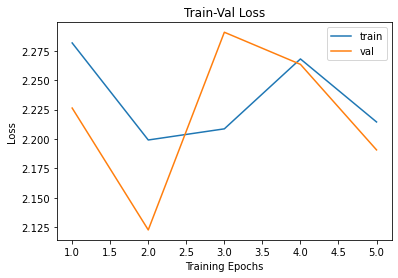

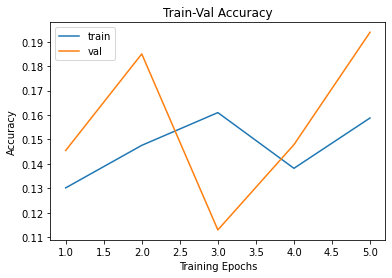

In [ ]:
# Train-Validation Progress
num_epochs=params_train["num_epochs"]

# plot loss progress
plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

# plot accuracy progress
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

In [28]:
while True:pass

KeyboardInterrupt: ignored

깊은 모델일수록 학습 초기에 수렴하기가 어렵다는 문제점이 있습니다. 5epoch로는 많이 부족하네요.